Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.dates import DateFormatter

Loading dataset

In [2]:
confirmed_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
country_wise_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
print(confirmed_df.shape)
print(recovered_df.shape)
print(deaths_df.shape)
print(country_wise_df.shape)

(266, 222)
(253, 222)
(266, 222)
(188, 14)


In [4]:
confirmed_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332


In [5]:
country_wise_df.head(5)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-08-27 16:28:36,33.93911,67.709953,38129.0,1401.0,29046.0,7682.0,97.946635,NaN,NaN,3.674369,4,AFG
1,Albania,2020-08-27 16:28:36,41.15330,20.168300,9083.0,266.0,4791.0,4026.0,315.623045,NaN,NaN,2.928548,8,ALB
2,Algeria,2020-08-27 16:28:36,28.03390,1.659600,42619.0,1465.0,29886.0,11268.0,97.190391,NaN,NaN,3.437434,12,DZA
3,Andorra,2020-08-27 16:28:36,42.50630,1.521800,1098.0,53.0,893.0,152.0,1421.083285,NaN,NaN,4.826958,20,AND
4,Angola,2020-08-27 16:28:36,-11.20270,17.873900,2332.0,103.0,977.0,1252.0,7.095421,NaN,NaN,4.416810,24,AGO


In [6]:
country_wise_df.set_index('Country_Region',inplace=True)

In [7]:
#No of countries
print(confirmed_df['Country/Region'].nunique())
print(recovered_df['Country/Region'].nunique())
print(deaths_df['Country/Region'].nunique())
print(country_wise_df.index.nunique())

188
188
188
188


In [8]:
print(len(confirmed_df))
print(len(recovered_df))
print(len(deaths_df))
print(len(country_wise_df))

266
253
266
188


Here number of rows is more than number of country (except in country_wise_df)  so some country contains more than 1 row with different states

# Handling Missing values

In [9]:
confirmed_df.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
8/22/20             0
8/23/20             0
8/24/20             0
8/25/20             0
8/26/20             0
Length: 222, dtype: int64

In [10]:
country_wise_df.isnull().sum()

Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                3
Active                   0
Incident_Rate            2
People_Tested          188
People_Hospitalized    188
Mortality_Rate           0
UID                      0
ISO3                     2
dtype: int64

In [11]:
country_wise_df[country_wise_df['Recovered'].isnull()]

,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
Country_Region,,,,,,,,,,,,,
MS Zaandam,2020-08-27 16:28:36,NaN,NaN,9.0,2.0,NaN,7.0,NaN,NaN,NaN,22.222222,8888,NaN
Serbia,2020-08-27 16:28:36,44.0165,21.0059,31099.0,707.0,NaN,30392.0,355.930904,NaN,NaN,2.273385,688,SRB
Sweden,2020-08-27 16:28:36,60.1282,18.6435,83898.0,5820.0,NaN,78078.0,830.733310,NaN,NaN,6.936995,752,SWE


In [12]:
country_wise_df.loc['Serbia',['Recovered']]=22299

In [13]:
country_wise_df['Recovered']=country_wise_df['Recovered'].fillna(0)

In [14]:
confirmed_df.replace(np.nan, ' ',inplace=True)
recovered_df.replace(np.nan, ' ',inplace=True)
deaths_df.replace(np.nan, ' ',inplace=True)
country_wise_df.replace(np.nan, ' ',inplace=True)

# Current  World wide situation

In [15]:
country_wise_df.columns

Index(['Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [16]:
global_data=country_wise_df.copy()[['Confirmed', 'Deaths','Recovered', 'Active']].sum()
pd.DataFrame(global_data).T

,Confirmed,Deaths,Recovered,Active
0,24242062.0,827165.0,15861984.0,7479568.0


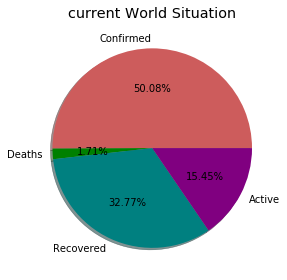

In [17]:
plt.style.use('ggplot')
plt.title('current World Situation')
plt.pie(global_data.values,labels=global_data.keys(),shadow=True,
        colors=['#CD5C5C','#008000','#008080','#800080'],autopct='%1.2f%%')
plt.tight_layout()
plt.show()

# Correlation analysis

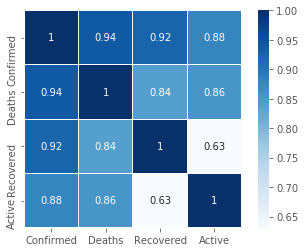

In [18]:
corr=country_wise_df[['Confirmed', 'Deaths','Recovered', 'Active']].corr()
sns.heatmap(corr,cmap='Blues',square=True,annot=True,linewidth=.04,robust=True)

# Country with high confirmed ,Deaths, cases

In [19]:
country_wise_df.columns

Index(['Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [20]:
def plot_top(country_wise_df,col_name):
    #plot horizontal bar graph of country with high reseective cases    
    plt.style.use('ggplot')
    country_wise_df['Recovered'].astype('int')
    Sorted=country_wise_df[['Confirmed','Deaths',
                 'Recovered','Active']].sort_values(by=col_name,ascending=False)
    plt.barh(Sorted.head(15).index,Sorted.head(15)[col_name].values)
    plt.gca().invert_yaxis()
    plt.title(f'Top {col_name} Cases')
    plt.xlabel(f'No of {col_name} cases')
    plt.tight_layout()
    plt.show()
    

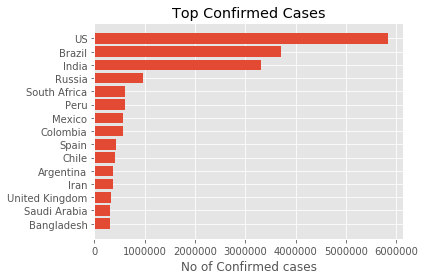

In [21]:
plot_top(country_wise_df,'Confirmed')

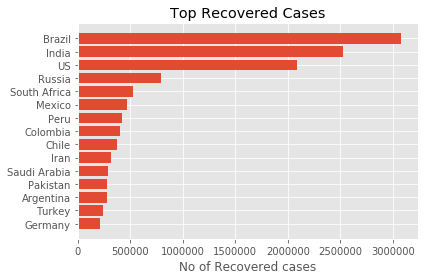

In [22]:
plot_top(country_wise_df,'Recovered')

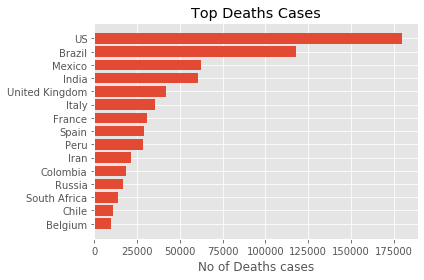

In [23]:
plot_top(country_wise_df,'Deaths')

# worldwide cases

In [24]:
def day_wise_sum(df,col_name):
    '''
    Function which count the specific  given case(ie confirmed or deaths or recovered)
    for each day  and returns the dataframe with date and respective  total case 
    '''
    df2=df.copy().drop(['Province/State','Country/Region','Lat','Long'],axis=1).sum()
    df2=pd.DataFrame(df2)
    df2.rename(columns={0:col_name},inplace=True)
    df2.index.names=['Date']
    df2.index=pd.to_datetime(df2.index)
    return df2    

In [25]:
confirmed=day_wise_sum(confirmed_df,'confirmed_cases')
recovered=day_wise_sum(recovered_df,'recovered_cases')
deaths=day_wise_sum(deaths_df,'deaths_cases')

In [26]:
confirmed.join([recovered,deaths])

,confirmed_cases,recovered_cases,deaths_cases
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-08-22,23203490,14911319,804413
2020-08-23,23420384,15137203,808674
2020-08-24,23647189,15337252,813015


In [27]:
#date format 
formatter=DateFormatter('%b,%Y')

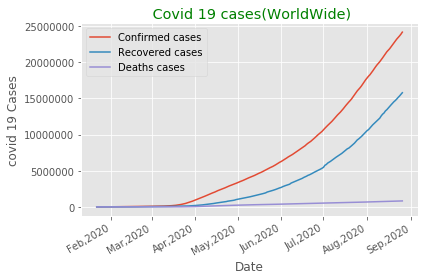

In [28]:
plt.style.use('ggplot')
plt.ticklabel_format(style='plain',axis='y')
plt.plot(confirmed.index,confirmed['confirmed_cases'],label='Confirmed cases')
plt.plot(recovered.index,recovered['recovered_cases'],label='Recovered cases')
plt.plot(deaths.index,deaths['deaths_cases'],label='Deaths cases')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.legend()
plt.title(' Covid 19 cases(WorldWide)',color='green')
plt.xlabel('Date')
plt.ylabel('covid 19 Cases')
plt.tight_layout()
plt.show()

#  Cases  in Different country

In [29]:
def specific_cases(df,country_name,col_name):
    '''
    From the given dataframe of specific cases return  that case in each day of any country
    '''
    
    df1=df.copy()
    df1.drop(['Province/State','Lat','Long'],axis=1,inplace=True)    
    df1=df1.groupby(by='Country/Region').sum()
    df1=df1[df1.index==country_name]
    df1=df1.T
    df1.columns=col_name
    df1.index.names=['Date']
    return df1

In [30]:
def specific_country(country_name):
    
    confirmed_cases=specific_cases(confirmed_df,country_name,['confirmed_cases'])
    recovered_cases=specific_cases(recovered_df,country_name,['recovered_cases'])
    deaths_cases=specific_cases(deaths_df,country_name,['deaths_cases'])   
    all_cases=confirmed_cases.join([recovered_cases,deaths_cases])
    all_cases.index=pd.to_datetime(all_cases.index)
    all_cases['active_cases']=all_cases['confirmed_cases']-all_cases['recovered_cases']-all_cases['deaths_cases']
    return all_cases

In [31]:
def plot_specific_country(df,country_name):
    
    plt.style.use('ggplot')
    plt.ticklabel_format(style='plain',axis='y')
    plt.plot(df.index,df['confirmed_cases'],label='Confirmed cases')
    plt.plot(df.index,df['recovered_cases'],label='Recovered cases')
    plt.plot(df.index,df['deaths_cases'],label='Deaths cases')
    plt.plot(df.index,df['active_cases'],label='Active cases',linewidth=3)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title(f'Covid 19 cases in {country_name}',color='green')
    plt.xlabel('Date')
    plt.ylabel('covid 19 Cases')
    plt.tight_layout()
    plt.show()

# Cases in nepal

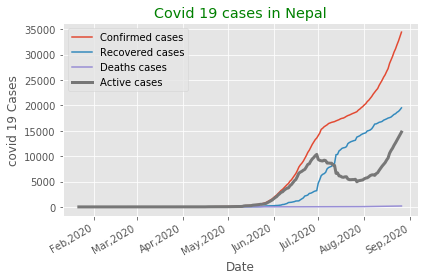

In [32]:
cases_in_Nepal=specific_country('Nepal')
plot_specific_country(cases_in_Nepal,'Nepal')

# Cases in US

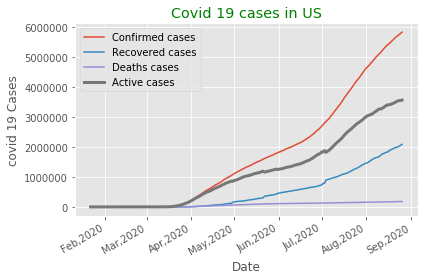

In [33]:
cases_in_US=specific_country('US')
plot_specific_country(cases_in_US,'US')

# Cases in India

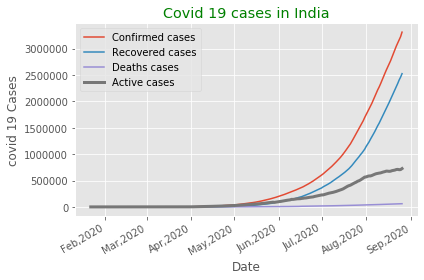

In [34]:
cases_in_india=specific_country('India')
plot_specific_country(cases_in_india,'India')

# Cases in China

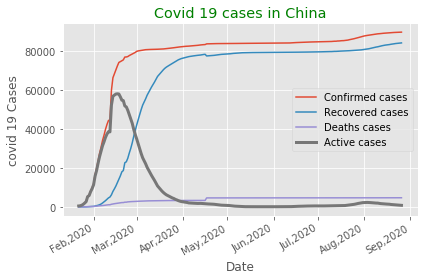

In [35]:
cases_in_China=specific_country('China')
plot_specific_country(cases_in_China,'China')

# Cases in Italy

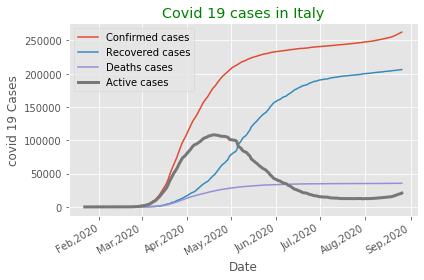

In [36]:
cases_in_Italy=specific_country('Italy')
plot_specific_country(cases_in_Italy,'Italy')

This is so much interesting and inspiring to see how China and Italy controlled covid-19 cases.
Other country need to take lessons from them.